# **Datos históricos del Bitcoin**
>**Base de datos:** [Historical Bitcoin Data](https://www.kaggle.com/umeshkumar017/historical-bitcoin-data?select=Bitcoin+Historical+Data+-+In+Rupees.csv)

>**Poster:** Bitcoin: Más que dinero, una inversión

# Equipo: 10
Grupo: 002 Miércoles

### Integrantes
- 1864878 Cerda Serrato Alan René
- 1867341 Cruz Lerma Jorge Antonio
- 1941475 Galindo Vázquez Jesús Alfonso
- 1630606 Valencia González Jesús Eduardo

# Introducción



¿Qué es el Bitcoin? 

>Bitcoin es un protocolo, proyecto de código abierto y red entre iguales que se utiliza como criptomoneda, sistema de pago y mercancía.
>Fue concebida en 2008​ por una entidad conocida bajo el seudónimo de Satoshi Nakamoto, cuya identidad concreta se desconoce. 
>En la actualidad, una cantidad considerable de empresas y pequeños negocios aceptan bitcoins como medio de pago​ para servicios de todo tipo. Su alcance internacional, y el hecho de que los usuarios pueden comerciar de forma pseudoanónima, ha permitido que se abra paso en sectores cada vez más regulados, como apuestas en línea y partidas de póker.

>El uso de Bitcoin y los servicios relacionados con él están sujetos a la legislación de cada país, provincia, municipio u otras entidades administrativas, pudiendo ser legal o ilegal dependiendo de si se han realizado decretos al respecto, o como consecuencia de la decisión expresa de reconocer o tratarlo como divisa, valor, mercancía, etc, por alguna entidad reguladora con jurisdicción en alguna de esas materias. 



# Descripción de los datos

> A) Los datos son descritos con una tabla que avanza mediante el tiempo, registrando la variabilidad de valor en la moneda. No presenta gráficos ni recursos visuales.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Bitcoin Historical Data - In Rupees.csv")
print("Tamaño de la base: ", df.shape, "\n\nTipos de variables:\n", df.dtypes, sep = "")

Tamaño de la base: (4056, 7)

Tipos de variables:
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


> B) La base de datos tiene 7 columnas y 4056 filas. Las columnas son:
1.   **Date** <- Fecha del dia de registro. Tipo de dato: **object** 
2.   **Price** <- Precio final de la moneda del día. Tipo de dato: **object**
3.   **Open** <- Valor de apertura del día. Tipo de dato: **object**
4.   **High** <- El valor más alto del día. Tipo de dato: **object**
5.   **Low** <- El valor más bajo del día. Tipo de dato: **object**
6.   **Vol.** <- Volumen de Bitcoins comerciados. Tipo de dato: **object**
7.   **Change %** <- Porcentaje de cambio. Tipo de dato: **object**



# Justificación del uso de datos

> Tenemos una gran curiosidad por el Bitcoin, especialmente porque el mundo de las criptomonedas es tendencia actualmente, sobre todo por su altísimo valor (a fecha de 30/08/2021, 1 bitcoin equivale a 975,756.02 MXN).


> Pueden tomar aún mas relevancia en el futuro, y para nuestra carrera (Actuaría), es de suma importancia estar enterados de las nuevas tendencias del mundo financiero.

> Uno de los beneficios sobre estar informado acerca de este tema, es que podriamos estar mejor preparados para una posible inversión u otro movimiento con la moneda.
Creemos que sin duda es un tema muy relevante, ya que las criptomonedas pueden ser el futuro de la economía.

# Objetivos

> **A)** El objetivo **principal** es predecir si es viable invertir en el Bitcoin a corto y mediano plazo.

> **B)** El objetivo **secundario** es predecir si el valor del bitcoin seguirá a la alza.

# Preguntas de Interés

> **1.-** ¿Cuál es precio más alto que ha alcanzado el Bitcoin?

> **2.-** ¿En que año empezó el auge del valor del Bitcoin?

# Programación

**Importar todas las librerías necesarias para la programación**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import rrule
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

**Importar la base de datos**

In [ ]:
df = pd.read_csv("/content/Bitcoin Historical Data - In Rupees.csv")

## **Limpieza de los datos**

**Tamaño de la base (filas, columnas)**

In [ ]:
df.shape

(4056, 7)

**Cantidad de datos nulos en las columnas**

In [ ]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

No hay datos nulos. La base está completa.

**Vista de la base sin modificar**

In [ ]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021","48,846.3","49,532.5","49,847.4","48,812.4",59.89K,-1.40%
1,"Aug 23, 2021","49,539.7","49,255.4","50,498.8","49,038.6",75.37K,0.58%
2,"Aug 22, 2021","49,254.5","48,870.4","49,480.3","48,151.0",49.32K,0.77%
3,"Aug 21, 2021","48,875.8","49,330.0","49,719.1","48,293.5",18.20K,-0.91%
4,"Aug 20, 2021","49,324.0","46,756.7","49,343.3","46,646.8",83.19K,5.49%
...,...,...,...,...,...,...,...
4051,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4052,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4053,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4054,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


Como vemos, los datos deben cambiar su formato para su correcta utilización, ya que hay símbolos que dificultarán el uso de los datos.

**Dar formato a los datos para usarlos correctamente**

In [ ]:
#Fuente: https://www.kaggle.com/anseldsouza/bitcoin-price-prediction-using-lstm

# Preparar los datos
df["Price"] = df["Price"].replace(",", "", regex = True)
df["Open"] = df["Open"].replace(",", "", regex = True)
df["High"] = df["High"].replace(",", "", regex = True)
df["Low"] = df["Low"].replace(",", "", regex = True)

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
df['Vol.'] = df['Vol.'].apply(value_to_float)

df["Change %"] = df["Change %"].replace("%", "", regex = True)

# A flotantes
df["Price"] = pd.to_numeric(df["Price"], downcast="float")
df["Open"] = pd.to_numeric(df["Open"], downcast="float")
df["High"] = pd.to_numeric(df["High"], downcast="float")
df["Low"] = pd.to_numeric(df["Low"], downcast="float")
df["Vol."] = pd.to_numeric(df["Vol."], downcast="float")
df["Change %"] = pd.to_numeric(df["Change %"], downcast="float")

df.head(3)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 24, 2021",48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40
1,"Aug 23, 2021",49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58
2,"Aug 22, 2021",49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77


In [ ]:
df.dtypes

Date         object
Price       float32
Open        float32
High        float32
Low         float32
Vol.        float32
Change %    float32
dtype: object

Los datos ya pueden usarse correctamente sin dificultades. Ya tienen el formato correcto.

Por ahora, no es necesario modificar el formato de la fecha, ya que esta es mera referencia para los precios.

**Cambiar los nombres de las columnas para mejor entendimiento de la base**

In [ ]:
df = df.rename(columns = {'Price':'Precio'})
df = df.rename(columns = {'Date':'Fecha'})
df = df.rename(columns = {'Open':'Apertura'})
df = df.rename(columns = {'High':'Alto'})
df = df.rename(columns = {'Low':'Bajo'})
df = df.rename(columns = {'Vol.':'Volumen'})
df = df.rename(columns = {'Change %':'Cambio (%)'})
df.head(3)

,Fecha,Precio,Apertura,Alto,Bajo,Volumen,Cambio (%)
0,"Aug 24, 2021",48846.300781,49532.500000,49847.398438,48812.398438,59890.0,-1.40
1,"Aug 23, 2021",49539.699219,49255.398438,50498.800781,49038.601562,75370.0,0.58
2,"Aug 22, 2021",49254.500000,48870.398438,49480.300781,48151.000000,49320.0,0.77


La base está lista. Ahora solo queda guardar la nueva base de datos:

In [ ]:
df.to_csv("Datos históricos del Bitcoin.csv")

## **Información estadística básica**

**Importamos la base nueva**

(La base que se modificó y guardó en la parte de limpieza)

In [ ]:
df = pd.read_csv("/content/Datos históricos del Bitcoin.csv")
df

,Unnamed: 0,Fecha,Precio,Apertura,Alto,Bajo,Volumen,Cambio (%)
0,0,"Aug 24, 2021",48846.3,49532.5,49847.4,48812.4,59890.0,-1.40
1,1,"Aug 23, 2021",49539.7,49255.4,50498.8,49038.6,75370.0,0.58
2,2,"Aug 22, 2021",49254.5,48870.4,49480.3,48151.0,49320.0,0.77
3,3,"Aug 21, 2021",48875.8,49330.0,49719.1,48293.5,18200.0,-0.91
4,4,"Aug 20, 2021",49324.0,46756.7,49343.3,46646.8,83190.0,5.49
...,...,...,...,...,...,...,...,...
4051,4051,"Jul 22, 2010",0.1,0.1,0.1,0.1,2160.0,0.00
4052,4052,"Jul 21, 2010",0.1,0.1,0.1,0.1,580.0,0.00
4053,4053,"Jul 20, 2010",0.1,0.1,0.1,0.1,260.0,0.00
4054,4054,"Jul 19, 2010",0.1,0.1,0.1,0.1,570.0,0.00


**Eliminamos la columna "Unnamed: 0"**

In [ ]:
df.drop(columns = "Unnamed: 0", inplace = True)
df.head(3)

,Fecha,Precio,Apertura,Alto,Bajo,Volumen,Cambio (%)
0,"Aug 24, 2021",48846.3,49532.5,49847.4,48812.4,59890.0,-1.40
1,"Aug 23, 2021",49539.7,49255.4,50498.8,49038.6,75370.0,0.58
2,"Aug 22, 2021",49254.5,48870.4,49480.3,48151.0,49320.0,0.77


**Promedio de las columnas**

In [ ]:
for i in range(1, len(df.columns)):
  print("El promedio de los elementos de la columna ", df.columns[i], " es ", df[df.columns[i]].mean())

El promedio de los elementos de la columna  Precio  es  5421.927292899433
El promedio de los elementos de la columna  Apertura  es  5409.91208086787
El promedio de los elementos de la columna  Alto  es  5575.478525641043
El promedio de los elementos de la columna  Bajo  es  5227.333703155872
El promedio de los elementos de la columna  Volumen  es  292762.82790927024
El promedio de los elementos de la columna  Cambio (%)  es  0.4939644970414198


Los promedios son importantes porque así nos podemos dar una idea general del comportamiento del Bitcoin de 2010 a 2021.

**Suma acumulada fila por fila**

In [ ]:
print("La suma acumulada del volumen es\n", df['Volumen'].cumsum())

La suma acumulada del volumen es
 0       5.989000e+04
1       1.352600e+05
2       1.845800e+05
3       2.027800e+05
4       2.859700e+05
            ...     
4051    1.187445e+09
4052    1.187445e+09
4053    1.187445e+09
4054    1.187446e+09
4055    1.187446e+09
Name: Volumen, Length: 4056, dtype: float64


De las sumas acumuladas, la suma del volumen es la única útil, ya que así podemos ver cómo crece el volumen del Bitcoin con cada día que pasa.

**Mínimos y máximos**

In [ ]:
for i in range(1, len(df.columns)):
  print("El mínimo de la columna ", df.columns[i], " es ", df[df.columns[i]].min(), " y el máximo es ", df[df.columns[i]].max())

El mínimo de la columna  Precio  es  0.1  y el máximo es  63540.9
El mínimo de la columna  Apertura  es  0.0  y el máximo es  63544.2
El mínimo de la columna  Alto  es  0.1  y el máximo es  64778.0
El mínimo de la columna  Bajo  es  0.0  y el máximo es  62067.5
El mínimo de la columna  Volumen  es  0.0  y el máximo es  20260000.0
El mínimo de la columna  Cambio (%)  es  -57.21  y el máximo es  336.84


Saber los máximos y mínimos nos ayuda a ver cómo ha mejorado el Bitcoin, o bien, el posible gran potencial que tiene.

Además, con esta información podemos contestar una de las preguntas de interés:

> **1.- ¿Cuál es precio más alto que ha alcanzado el Bitcoin?**

>La respuesta es: **63,540.9 USD**

**Desviación estándar**

In [ ]:
for i in range(1, len(df.columns)):
  print("La desviación estándar de la columna", df.columns[i], "es", df[df.columns[i]].std())

La desviación estándar de la columna Precio es 10816.886398866334
La desviación estándar de la columna Apertura es 10795.756470951057
La desviación estándar de la columna Alto es 11141.061146863907
La desviación estándar de la columna Bajo es 10406.451635156804
La desviación estándar de la columna Volumen es 983381.4437095218
La desviación estándar de la columna Cambio (%) es 7.739581700286563


Con la desviación estándar podemos saber más o menos cuánto varían los datos y saber qué tan estable es el Bitcoin.

**Correlación**

In [ ]:
df.corr()

,Precio,Apertura,Alto,Bajo,Volumen,Cambio (%)
Precio,1.000000,0.998832,0.999497,0.999337,0.060510,-0.004513
Apertura,0.998832,1.000000,0.999483,0.999041,0.061104,-0.017551
Alto,0.999497,0.999483,1.000000,0.998949,0.060524,-0.010393
Bajo,0.999337,0.999041,0.998949,1.000000,0.060949,-0.009531
Volumen,0.060510,0.061104,0.060524,0.060949,1.000000,-0.009292
Cambio (%),-0.004513,-0.017551,-0.010393,-0.009531,-0.009292,1.000000


Y por último, la correlación. Con esto podemos saber cuáles variables están relacionadas con otras y en qué medida. A mayor correlación, mayor relación entre las variables.

En el siguiente mapa de correlación esto se aprecia mejor:

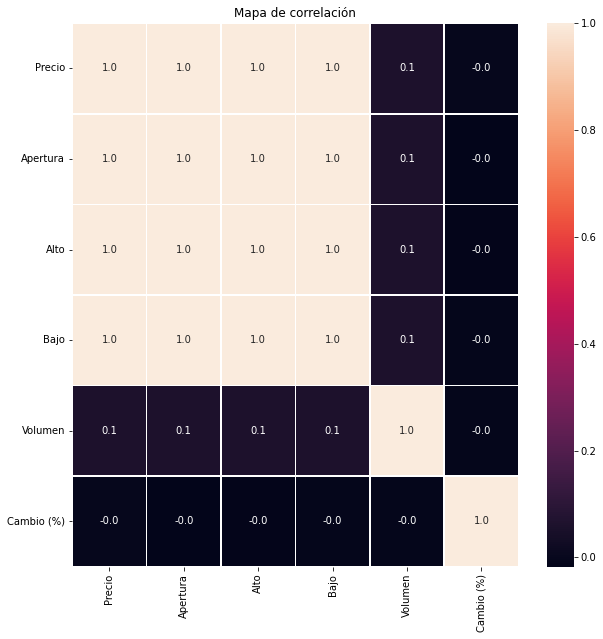

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot= True, linewidths = 0.5, fmt = ".1f", ax = ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Mientras más claros los cuadros, más correlacionadas están las variables.

Como vemos, los precios se relacionan mucho entre sí, pero estos no se relacionan casi nada con el volumen o el cambio del porcentaje.

##**Gráficas**

**Gráfica 1**

Para la primera gráfica, se ordenaron los datos de más antiguo a más actual para una mejor visualización. Queremos ver el comportamiento del Bitcoin del 2010 al 2021:

- Ordenar todos los datos. Esto facilitará el uso de los datos en las gráficas posteriores:

In [ ]:
id = len(df['Fecha']) - 1
newListf = []
newListp = []
newListpap = []
newListpa = []
newListpb = []
newListvol = []
newListc = []

while (id >= 0):
  newListf.append(df['Fecha'][id])
  newListp.append(df['Precio'][id])
  newListpap.append(df['Apertura'][id])
  newListpa.append(df['Alto'][id])
  newListpb.append(df['Bajo'][id])
  newListvol.append(df['Volumen'][id])
  newListc.append(df['Cambio (%)'][id])

  id = id - 1

fecha = newListf
precio = newListp
apertura = newListpap
alto = newListpa
bajo = newListpb
volumen = newListvol
cambio = newListc

df['Fecha'] = fecha
df['Precio'] = precio
df['Apertura'] = apertura
df['Alto'] = alto
df['Bajo'] = bajo
df['Volumen'] = volumen
df['Cambio (%)'] = cambio

- Ver gráfica

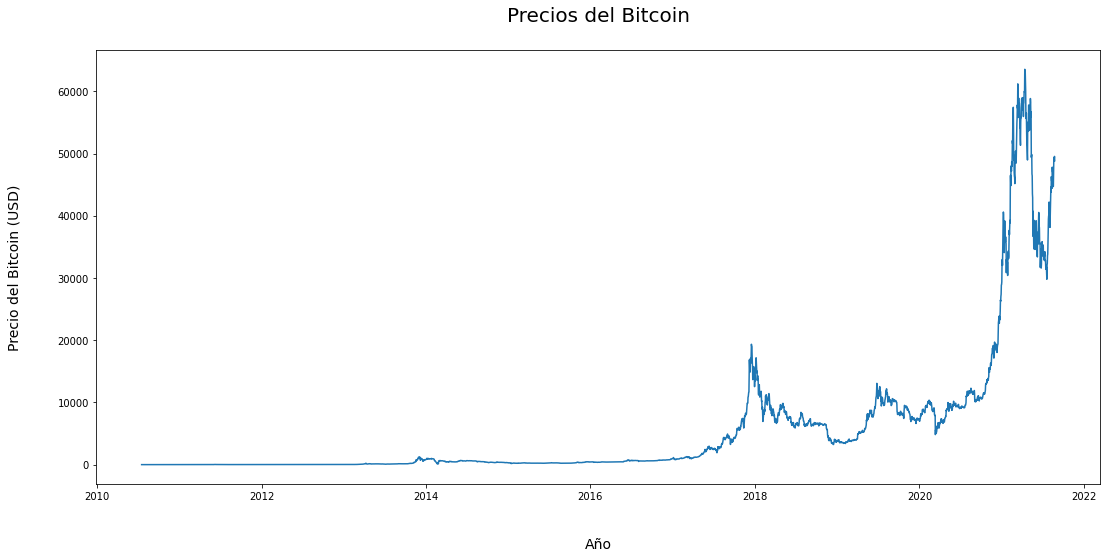

In [ ]:
fig, ax = plt.subplots(figsize = (18, 8))
ax.plot(fecha, precio)
plt.xticks([-199, 533, 1263, 1993, 2724, 3454, 4186], ['2010', '2012', '2014', '2016', '2018', '2020', '2022'])
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\n\nAño", fontsize = 14)
plt.title("Precios del Bitcoin\n", fontsize = 20)

# Mostrar
plt.show()

Se ve evidentemente que conforme avanzó el tiempo, el precio del Bitcoin subió. Se está recuperando de una caída muy notoria.

Además, gracias a esta gráfica podemos contestar la segunda pregunta de interés:

>**2.- ¿En que año empezó el auge del valor del Bitcoin?**

>La respuesta es: **En 2020**. A pesar de que en 2018 tuvo una alza en el precio, volvió a bajar casi hasta donde empezó, pero en 2020 comenzó a crecer considerablemente.

**Gráfica 2**

Ahora veremos una gráfica que muestre el comportamiento de los precios más bajos, más altos y finales, diarios del 1/Julio/2021 al 24/Agosto/2021.

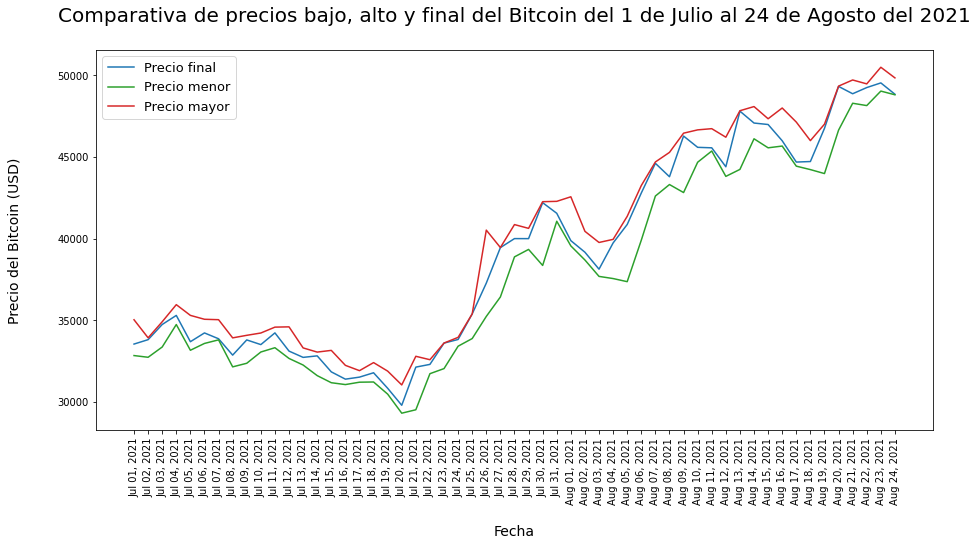

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(fecha[4001:], precio[4001:], color = 'tab:blue', label = "Precio final")
ax.plot(fecha[4001:], bajo[4001:], color = 'tab:green', label = "Precio menor")
ax.plot(fecha[4001:], alto[4001:], color = 'tab:red', label = "Precio mayor")
plt.legend(loc = 'upper left', fontsize = 13)
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\nFecha", fontsize = 14)
plt.title("Comparativa de precios bajo, alto y final del Bitcoin del 1 de Julio al 24 de Agosto del 2021\n", fontsize = 20)
plt.xticks(rotation = 90) # Fuente de apoyo para esta línea: https://www.delftstack.com/es/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
plt.show()

En la **gráfica 2** se muestran solo los datos del 1/Jul/2021 al 24/Ago/2021 con el fin de mostrar con mayor claridad la separación entre cada línea de precios, ya que si se grafican todos los datos, como en la **gráfica 1**, no se puede apreciar bien cómo se comporta el precio del Bitcoin comparándolo con su máximo y mínimo diario.

Y vemos que en los últimos registros de la base de datos, el precio del Bitcoin va a la alza.

**Gráfica 3**

Ahora que vimos el comportamiento del Bitcoin, veamos cómo se relaciona el precio final con el precio más bajo diario de manera gráfica:

Text(0, 0.5, 'Precio (USD)\n')

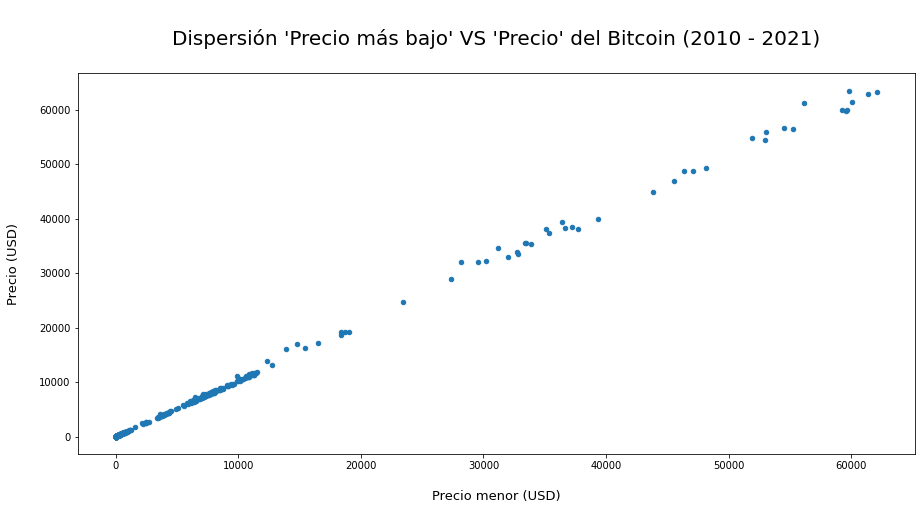

In [ ]:
df[df['Precio'] < 70000].sample(500).plot.scatter(x = 'Bajo', y = 'Precio', figsize = (15, 7))
plt.title("\nDispersión 'Precio más bajo' VS 'Precio' del Bitcoin (2010 - 2021)\n", fontsize = 20)
plt.xlabel("\nPrecio menor (USD)", fontsize = 13)
plt.ylabel("Precio (USD)\n", fontsize = 13)

Como vemos en la **gráfica 3**, el precio al final del día y el precio menor del Bitcoin (Price, Low) están muy relacionados. Dependiendo de cuánto sea el precio menor (Low), será el precio del Bitcoin (Price) cada día.

(Se usaron 500 muestras para poder ver mejor la dispersión en los precios más altos. Esto porque la mayoría de los datos están entre 0 y 10,000).

**Gráfica 4**

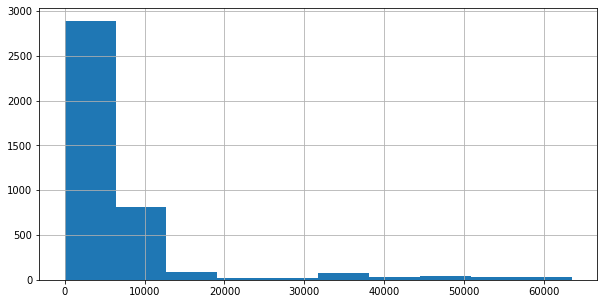

In [ ]:
df.Precio.hist(figsize=(10,5))

Podemos ver que el precio maximo alcanzado del bitcoin está alrededor del 60,000.

Además, es claro que la mayoría de los datos del precio del Bitcoin están entre el 0 y el 10,000.

### Conclusión de la visualización (Gráficas)

Con la estadística básica y la **gráfica 1**, ya podemos contestar correctamente las preguntas de interés:

>**1.- ¿Cuál es precio más alto que ha alcanzado el Bitcoin?**

> La respuesta es: **63,540.8984375 USD**

>**2.- ¿En que año empezó el auge del valor del Bitcoin?**
 
>La respuesta es: **En 2020**. A pesar de que en 2018 tuvo una alza en el precio, volvió a bajar casi hasta donde empezó, pero en 2020 comenzó a crecer considerablemente.

Parece que podemos decir que la tandencia del precio del Bitcoin es creciente y que así seguirá, pero todavía no lo podemos asegurar, ya que hubo momentos en los que el precio bajó mucho.

La estrategia que teníamos era que debemos hacer predicciones para asegurar la resolución correcta de los objetivos, y eso siguió igual. Se harán predicciones, veremos su comportamiento y nos aseguraremos del comportamiento futuro del Bitcoin.

## **Técnica de minería**

**(Series de tiempo)**

La técnica de minería que se usará es la de "series de tiempo" debido a la naturaleza de los datos (precios y fechas) y a nuestros objetivos, los cuales se basan en la predicción de los precios del Bitcoin para determinar si es viable o no invertir en dicha moneda, y si el precio del Botcoin seguirá a la alza.

**Preparar los datos**

En este punto, la base de datos ya está ordenada de más antiguo a más actual, y los datos tienen el formato correcto, pero no se habían modificado los datos de la columna "Fecha". Ahora sí es necesario modificarlor para facilitar el uso de las series de tiempo:

In [ ]:
#Fuente de esta celda de código: https://www.kaggle.com/anseldsouza/bitcoin-price-prediction-using-lstm

df.drop(columns = {'Apertura', 'Alto', 'Bajo', 'Volumen', 'Cambio (%)'}, inplace = True)

df["Fecha"] = df["Fecha"].replace(",", "", regex=True)
df["Fecha"] = df["Fecha"].replace(" ", "-", regex=True)
df["Fecha"] = df["Fecha"].replace("Jan", "01", regex=True)
df["Fecha"] = df["Fecha"].replace("Feb", "02", regex=True)
df["Fecha"] = df["Fecha"].replace("Mar", "03", regex=True)
df["Fecha"] = df["Fecha"].replace("Apr", "04", regex=True)
df["Fecha"] = df["Fecha"].replace("May", "05", regex=True)
df["Fecha"] = df["Fecha"].replace("Jun", "06", regex=True)
df["Fecha"] = df["Fecha"].replace("Jul", "07", regex=True)
df["Fecha"] = df["Fecha"].replace("Aug", "08", regex=True)
df["Fecha"] = df["Fecha"].replace("Sep", "09", regex=True)
df["Fecha"] = df["Fecha"].replace("Oct", "10", regex=True)
df["Fecha"] = df["Fecha"].replace("Nov", "11", regex=True)
df["Fecha"] = df["Fecha"].replace("Dec", "12", regex=True)

df['Fecha'] = pd.to_datetime(df["Fecha"], format='%m-%d-%Y')

print(df.head(3), "\n\nTipos de variables:\n", df.dtypes)

       Fecha  Precio
0 2010-07-18     0.1
1 2010-07-19     0.1
2 2010-07-20     0.1 

Tipos de variables:
 Fecha     datetime64[ns]
Precio           float64
dtype: object


La serie ya tiene el formato correcto y se eliminaron las columnas que no son precios y fechas, ya que no son necesarias para cumplir nuestros objetivos:
> **A)** Principal: Predecir si es viable invertir en el Bitcoin a corto y mediano plazo.

> **B)** Secundario: Predecir si el valor del bitcoin seguirá a la alza.

**Mostrar gráfica de los precios del Bitcoin (gráfica 1)**

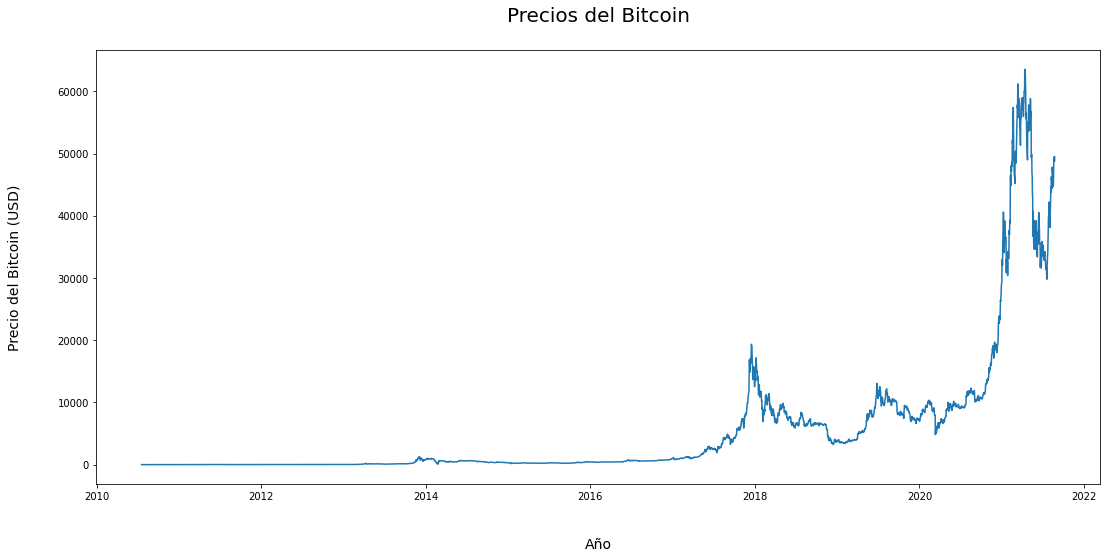

In [ ]:
# Fuente de apoyo: https://aprendeconalf.es/docencia/python/manual/matplotlib/
fig, ax = plt.subplots(figsize = (18, 8))
ax.plot(df['Fecha'], df['Precio'])
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\n\nAño", fontsize = 14)
plt.title("Precios del Bitcoin\n", fontsize = 20)

# Mostrar
plt.show()

Como vemos, la serie no es estacionaria en media, ya que hay tendencia muy notoria.

**Revisamos la estacionariedad en varianza con la prueba de Dickey-Fuller aumentada:**

In [ ]:
# Fuente para saber cuál número es el p-valor: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
adfuller(df['Precio'], autolag='AIC')[1]

0.9646850442930232

El número mostrado anteriormente es el p-valor.

Suponiendo que utilizamos una confianza del 99%, podemos decir que la serie es NO estacionaria en varianza, ya que p-valor > 0.01

Por lo que debemos corregir la serie.

**Corrección 1**

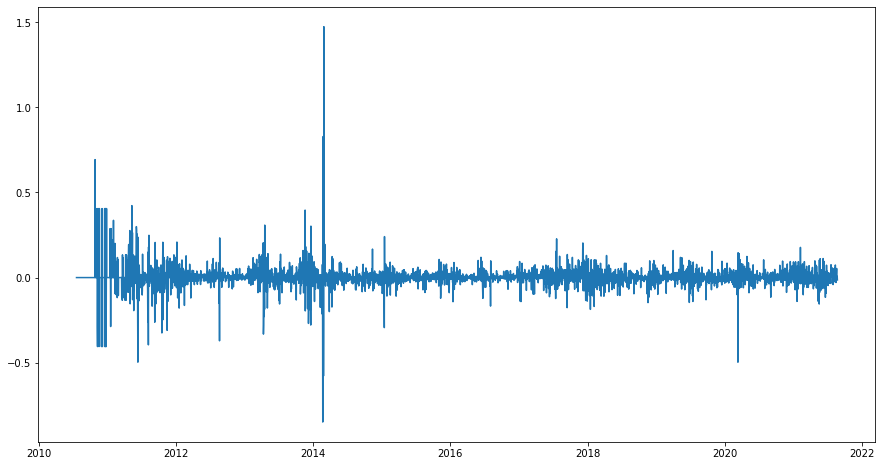

In [ ]:
price = np.diff(np.log(df['Precio']))

fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(df.Fecha[1:4056], price)

plt.show()

Revisar estacionariedad en varianza:

In [ ]:
price = pd.DataFrame(np.diff(np.log(df['Precio'])), columns = {"Cor1"})
price.replace([np.inf, -np.inf], np.nan, inplace = True)
price.dropna(axis = 0, how = 'any', inplace = True)
adfuller(price['Cor1'], autolag = 'AIC')[1]

0.0

Ya es estacionaria en varianza, y la gráfica nos dice que también es estacionaria en media (porque no tiene tendencia), por lo que la serie ya es estacionaria.

**Modelado**

- Cálculo del parámetro p:

In [ ]:
aic = np.inf
a = 0
for i in range(0,10):
  modelo = ARIMA(price, order=(i,0,0))
  modelo_llenado = modelo.fit()
  n = modelo_llenado.aic
  if n < aic:
    aic = n
    a = i

print("Parámetro p =", a, "\nParámetro q = 0\nAIC del modelo =", aic)

Parámetro p = 6 
Parámetro q = 0
AIC del modelo = -10639.253889355703


- Cálculo del parámetro q:

In [ ]:
aic = np.inf
a = 0
for i in range(1,6):
  modelo = ARIMA(price, order=(6,0,i))
  modelo_llenado = modelo.fit()
  n = modelo_llenado.aic
  if n < aic:
    aic = n
    a = i
    
print("Parámetro p = 6\nParámetro q =", a, "\nAIC del modelo =", aic)

Parámetro p = 6
Parámetro q = 5 
AIC del modelo = -10649.427467344656


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


El mejor modelo para la serie corregida es un modelo **ARMA(6,5)**.

Pero como se tuvo que hacer una diferenciación para hecer estacionaria a la serie, entonces el modelo para la serie original es un **ARIMA(6,1,5)**.

**Procedemos a mostrar las predicciones**
- Generamos el modelo "ARIMA(6,1,5)" para los datos originales

In [ ]:
modelo_original = ARIMA(df['Precio'], order = (6, 1, 5))
mod_or_llenado = modelo_original.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


- Cálculo de predicciones (25/Ago/2021 - 31/Dic/2023)

In [ ]:
#Fuentes de apoyo: https://www.it-swarm-es.com/es/python/creando-un-rango-de-fechas-en-python/957692062/  

P = pd.DataFrame(mod_or_llenado.forecast(859, alpha = 0.05)[0].tolist(), columns = {'Predicciones'})
D = pd.DataFrame(mod_or_llenado.forecast(859, alpha = 0.05)[2].tolist(), columns = {'Máximo', 'Mínimo'})
Tabla_predicciones = pd.DataFrame(list(rrule.rrule(rrule.DAILY,count=859, dtstart = datetime.strptime("25-08-2021", "%d-%m-%Y"))), columns = {'Fecha'})
Tabla_predicciones['Predicciones'] = P['Predicciones']
Tabla_predicciones['Máximo (95% de confianza)'] = D['Mínimo']
Tabla_predicciones['Mínimo (95% de confianza)'] = D['Máximo']
Tabla_predicciones

,Fecha,Predicciones,Máximo (95% de confianza),Mínimo (95% de confianza)
0,2021-08-25,48743.204412,49739.905845,47746.502979
1,2021-08-26,48973.655039,50339.236097,47608.073981
2,2021-08-27,48817.454933,50501.440484,47133.469383
3,2021-08-28,48497.153017,50468.240810,46526.065224
4,2021-08-29,48631.196806,50851.958432,46410.435180
...,...,...,...,...
854,2023-12-27,59103.839610,88612.395268,29595.283953
855,2023-12-28,59115.979122,88641.787876,29590.170369
856,2023-12-29,59128.081964,88671.133872,29585.030056
857,2023-12-30,59140.215367,88700.500268,29579.930467


Es importante mencionar que las columnas de mínimo y máximo no se refieren a que es el valor mínimo y máximo que el Bitcoin va a tomar cada día. Es un intervalo de confianza en el que se encuentra el valor mostrado en "Predicciones".

- Gráfica de las predicciones

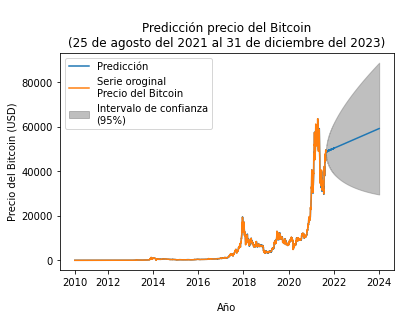

In [ ]:
#Fuente de apoyo: https://docs.w3cub.com/statsmodels/generated/statsmodels.tsa.arima_model.arimaresults.plot_predict

mod_or_llenado.plot_predict(1, 4915, alpha = 0.05)
plt.xticks([0, 533, 1263, 1993, 2724, 3454, 4186, 4915], [2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024])
plt.title("\nPredicción precio del Bitcoin\n(25 de agosto del 2021 al 31 de diciembre del 2023)")
plt.xlabel("\nAño")
plt.ylabel("Precio del Bitcoin (USD)")
plt.legend(["Predicción", "Serie oroginal\nPrecio del Bitcoin", "Intervalo de confianza\n(95%)"], loc = "upper left")

Ya resolvimos los objetivos, los cuales son:
> **A)** Principal: Predecir si es viable invertir en el Bitcoin a corto y mediano plazo.

> **B)** Secundario: Predecir si el valor del bitcoin seguirá a la alza.

Como vemos en la gráfica y la tabla de predicciones, es viable invertir en Bitcoin a corto, mediano e incluso a largo plazo, ya que el valor del Bitcoin seguirá a la alza, lo que generaría ganancias.

## **Métricas de evaluación**

**AIC**

In [ ]:
print("El mejor modelo relativo para las correciones es ARMA(6,5)\ny tiene un aic =", modelo_llenado.aic,
      "\n\nEl mejor modelo relativo para los precios del Bitcoin es ARIMA(6,1,5)\ny su AIC es: ", mod_or_llenado.aic)

El mejor modelo relativo para las correciones es ARMA(6,5)
y tiene un aic = -10649.427467344656 

El mejor modelo relativo para los precios del Bitcoin es ARIMA(6,1,5)
y su AIC es:  62081.99818703077


Este es el mejor modelo relativo ya que es el que tiene el menor AIC en comparación a otros modelos revisados con diferentes parámetros p,q.

**Revisar qué tan bueno es el modelo de manera gráfica**
- Generar el modelo

In [ ]:
modelo_original = ARIMA(df['Precio'], order = (6, 1, 5))
mod_or_llenado = modelo_original.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


- Mostrar los valores estimados comparándolos con los valores reales

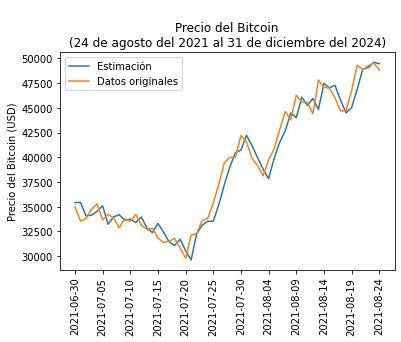

In [ ]:
mod_or_llenado.plot_predict(4000, 4055, alpha = 0.15)
plt.xticks([4000, 4005, 4010, 4015, 4020, 4025, 4030, 4035, 4040, 4045, 4050, 4055],
           ["2021-06-30", "2021-07-05", "2021-07-10", "2021-07-15", "2021-07-20", "2021-07-25", "2021-07-30",
            "2021-08-04", "2021-08-09", "2021-08-14", "2021-08-19", "2021-08-24"], rotation = 90)
plt.title("\nPrecio del Bitcoin\n(24 de agosto del 2021 al 31 de diciembre del 2024)")
plt.ylabel("Precio del Bitcoin (USD)")
plt.legend(["Estimación", "Datos originales"], loc = "upper left")

Se tomaron solo los datos del 30/Jun/2021 al 24/Ago/2021 para que se vean claramente ambas líneas en la gráfica, y como vemos, las estimaciones se acercan mucho a los datos originales, por lo que podemos decir que **ARIMA(6,1,5)** es es un buen modelo para los precios del Bitcoin.

[Fuente de las métricas de evaluación siguientes](https://polmartisanahuja.com/metricas-de-evaluacion-de-rendimiento-para-predicciones-de-series-temporales/)

**Error absoluto medio**

In [ ]:
np.mean(np.abs((mod_or_llenado.fittedvalues + df['Precio']) - df['Precio']))

59.328215328677075

Como vemos, el error absoluto medio es bajo si tomamos en cuenta la naturaleza de los datos, ya que los precios son en miles de dólares.

Parece ser que el modelo es bueno. Tiene buen ajuste.

**Raíz del error cuadrático medio (RMSE)**

In [ ]:
np.sqrt(np.mean(((mod_or_llenado.fittedvalues + df['Precio']) - df['Precio'])**2))

124.31272573468375

Este error también es bajo, lo que se traduce como un buen ajuste del modelo.

**Error porcentual absoluto medio (MAPE)**

In [ ]:
print(round(np.mean(np.abs((mod_or_llenado.fittedvalues + df['Precio']) - df['Precio']) / (mod_or_llenado.fittedvalues + df['Precio'])) * 100, 2),"%", sep = "")

18.88%


Hay poco error porcentual, es decir, los datos estimados se acercan mucho a los datos reales.

## **Conclusiones de los resultados obtenidos**

- Primero que nada, los resultados de la técnica resuelven los objetivos planteados, lo cuales son:

 - **Principal:** Predecir si es viable invertir en el Bitcoin a corto y mediano plazo.

 - **Secundario:** Predecir si el valor del bitcoin seguirá a la alza.

 Como vimos antes, el precio del Bitcoin seguirá subiendo, es decir, seguirá a la alza, por lo que es viable invertir en Bitcoin.

- Las métricas de evaluación hacen el trabajo comparable, ya que gracias a estas se puede ver qué tanto se ajusta el modelo.

 Viendo los errores y la gráfica comparativa de estamaciones y datos reales, podemos decir que el modelo se ajusta bien.

## **Trabajo a futuro**

El hecho de que los errores no sean 0, significa que el modelo no es perfecto. Se ajusta bien, pero no es mejor absoluto, por lo que este puede mejorarse si se comparan más modelo con diferentes parámetros p,q.

 - A continuación se muestra una tabla con la predicción de los precios del Bitcoin de los días del 8/Oct/2021 al 13/Oct/2021.

 - La imagen posterior a la tabla muestra el precio real del Bitcoin de los mismos días. [Precio Bitcoin](https://mx.investing.com/crypto/bitcoin/historical-data)

In [ ]:
Tabla_predicciones[44:50]

,Fecha,Predicciones,Máximo (95% de confianza),Mínimo (95% de confianza)
44,2021-10-08,49250.627452,56011.473268,42489.781636
45,2021-10-09,49152.684255,55989.570037,42315.798474
46,2021-10-10,49308.766056,56219.874598,42397.657515
47,2021-10-11,49431.340745,56417.839308,42444.842182
48,2021-10-12,49303.213867,56364.826857,42241.600878
49,2021-10-13,49356.600307,56486.971846,42226.228769


Como de dijo antes, es importante dejar claro que las columnas de mínimo y máximo de la tabla de predicciones no se refieren a que es el valor mínimo y máximo que el Bitcoin va a tomar cada día. Es un intervalo de confianza en el que se encuentra el valor mostrado en "Predicciones".

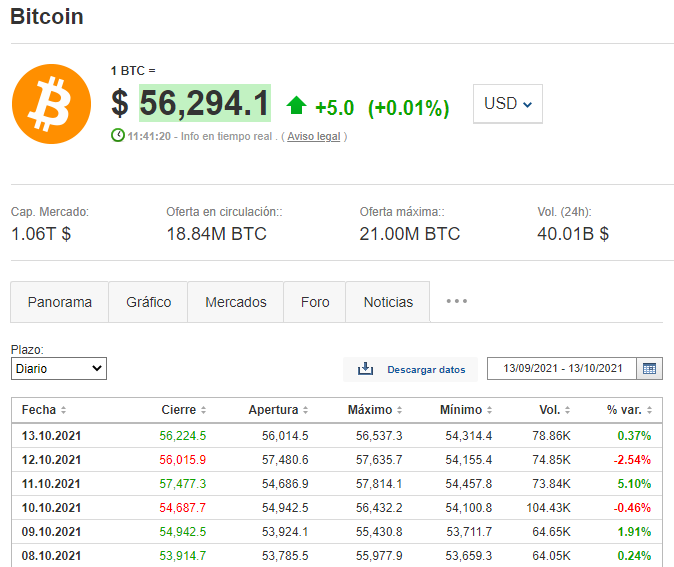

Para ver mejor los datos, los graficamos y tenemos:

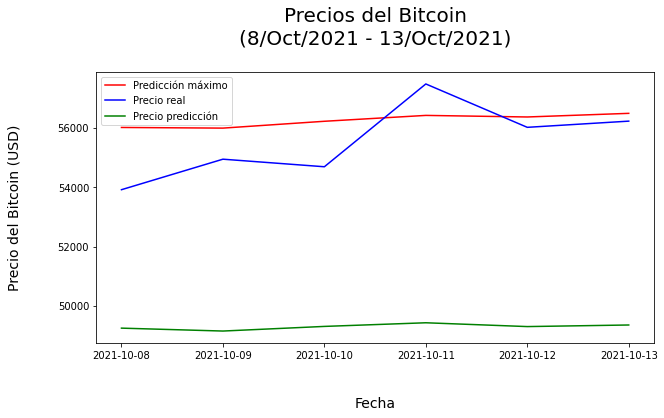

In [ ]:
# Fuente de apoyo: https://aprendeconalf.es/docencia/python/manual/matplotlib/
fig, ax = plt.subplots(figsize = (10, 5))
prm = Tabla_predicciones['Máximo (95% de confianza)'][44:50]
pr = Tabla_predicciones['Predicciones'][44:50]
fe = Tabla_predicciones['Fecha'][44:50]
prr = [53914.7, 54942.5, 54687.7, 57477.3, 56015.9, 56224.5]
ax.plot(fe, prm, color = "red", label = "Predicción máximo")
ax.plot(fe, prr, color = "blue", label = "Precio real")
ax.plot(fe, pr, color = "green", label = "Precio predicción")
plt.legend()
plt.ylabel("Precio del Bitcoin (USD)\n\n", fontsize = 14)
plt.xlabel("\n\nFecha", fontsize = 14)
plt.title("Precios del Bitcoin\n(8/Oct/2021 - 13/Oct/2021)\n", fontsize = 20)

# Mostrar
plt.show()

Entonces, al menos para los los días del 8/Oct/2021 al 13/Oct/2021, parece ser que el modelo está bien ajustado, ya que el precio real se movió como lo predijo el modelo estimado.

Pero como vemos, se puede mejorar, ya que no todos los datos están en el rango predicho.